In [0]:
run Lattice_functions.ipynb

In [0]:
#Generating the lattice
nx = 20 + 1 # 1 added to make the total length = 20*0.01
ny = 20 + 1
lx = 0.05
ly = 0.05
k_inPlane = 1e3
nz = 3
lz = 0.01
k_vertical = 1.4e5

M3 = Rect_Lattice(nx, ny, lx, ly, k_inPlane, [], [], [])
M3 = add_braces_to_rectangular_lattice(M3, k_inPlane, '|')
M3 = add_layers_in_z_direction(M3, nz, lz, k_vertical, k_vertical, [1, 2, 3, 4])

#setting z of the middle layer to zero and deriving support conditions:
min_x = M3.nodes[1].x
min_y = M3.nodes[1].y
max_x = M3.nodes[1].x
max_y = M3.nodes[1].y

for i in M3.nodes:
    i.z = round(i.z, 12) - lz
    i.x = round(i.x, 12)
    i.y = round(i.y, 12)
    min_x = min(i.x, min_x)
    min_y = min(i.y, min_y)
    max_x = max(i.x, max_x)
    max_y = max(i.y, max_y)

#Adding support
for i in M3.nodes:
    if(i.z == 0):
        if(i.x == min_x or i.x == max_x or i.y == min_y or i.y == max_y):
            i.s_x = 1
            i.s_y = 1
            i.s_z = 1
            M3.support_x.append(i.n)
            M3.support_y.append(i.n)
            M3.support_z.append(i.n)


mid_node = int(nx*ny + (nx*ny + 1)/2) #Only for odd nx and ny

In [0]:
#Optimization preparation:
x0 = []
y0 = []
z0 = []
for i in M3.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)

coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3) 

#bounds:
lb = -1.2*lz*np.ones(len(coord0))
ub = np.inf*np.ones(len(coord0))

for i in M3.support_x:
    lb[i - 1] = x0[i - 1]
    ub[i - 1] = x0[i - 1]

for i in M3.support_y:
    lb[nNodes + i - 1] = y0[i - 1]
    ub[nNodes + i - 1] = y0[i - 1]
    
for i in M3.support_z:
    lb[(2*nNodes) + i - 1] = z0[i - 1]
    ub[(2*nNodes) + i - 1] = z0[i - 1]


bounds = Bounds(lb, ub)

z0 = z0 + (np.random.rand(len(z0))/100)
z0 = z0.tolist()
coord0 = x0 + y0 + z0

#Defining half step force
f0 = Point_load_at_centre(0, M3)

In [0]:
#Uniform strain in yy and zz
deformed_springs = []
for i in M3.springs:
  if (abs(M3.nodes[i.i - 1].z - M3.nodes[i.j - 1].z) == 0):
    i.l0 = 1.1*i.l0
    deformed_springs.append(i.n)


In [0]:
#Uniform strain all
deformed_springs = []
for i in M3.springs:
  i.l0 = 1.1*i.l0
  deformed_springs.append(i.n)


In [0]:
#Temp Gradient
deformed_springs = []

for i in M3.springs:
  if (abs(M3.nodes[i.i - 1].z - M3.nodes[i.j - 1].z) == 0):
    if(M3.nodes[i.i - 1].z == -lz and M3.nodes[i.j - 1].z  == -lz):
      i.l0 = 0.8*i.l0
      deformed_springs.append(i.n)
    
    if(M3.nodes[i.i - 1].z == lz and M3.nodes[i.j - 1].z  == lz):
      i.l0 = 1.2*i.l0
      deformed_springs.append(i.n)


In [0]:
#circular pattern strain
deformed_springs = []

for i in M3.springs:
  r = 0.25
  x0 = 0.5
  y0 = 0.5

  if (abs(M3.nodes[i.i - 1].z - M3.nodes[i.j - 1].z) == 0):
    if(M3.nodes[i.i - 1].z == -lz and M3.nodes[i.j - 1].z  == -lz):
      x1 = M3.nodes[i.i - 1].x
      y1 = M3.nodes[i.i - 1].y
      x2 = M3.nodes[i.j - 1].x
      y2 = M3.nodes[i.j - 1].y

      if(Length(x1, y1, 0, x0, y0, 0) < r or Length(x2, y2, 0, x0, y0, 0) < r):
        i.l0 = 1.2*i.l0
        deformed_springs.append(i.n)

    if(M3.nodes[i.i - 1].z == 0 and M3.nodes[i.j - 1].z  == 0):
      x1 = M3.nodes[i.i - 1].x
      y1 = M3.nodes[i.i - 1].y
      x2 = M3.nodes[i.j - 1].x
      y2 = M3.nodes[i.j - 1].y

      if(Length(x1, y1, 0, x0, y0, 0) < r or Length(x2, y2, 0, x0, y0, 0) < r):
        i.l0 = 1.2*i.l0
        deformed_springs.append(i.n)

    if(M3.nodes[i.i - 1].z == lz and M3.nodes[i.j - 1].z  == lz):
      x1 = M3.nodes[i.i - 1].x
      y1 = M3.nodes[i.i - 1].y
      x2 = M3.nodes[i.j - 1].x
      y2 = M3.nodes[i.j - 1].y

      if(Length(x1, y1, 0, x0, y0, 0) < r or Length(x2, y2, 0, x0, y0, 0) < r):
        i.l0 = 1.2*i.l0
        deformed_springs.append(i.n)


In [0]:
#Randomly Choosen Springs

nSprings = len(M3.springs)
nDeformed = int(0.1*nSprings)
deformed_springs = np.random.randint(1, nSprings, nDeformed)
for i in deformed_springs:
  M3.springs[i - 1].l0 = 1.1*M3.springs[i - 1].l0

In [0]:
res = minimize(Energy, coord0, args = (f0, M3), method='L-BFGS-B', jac = Jacobian, options={'iprint': 1}, bounds=bounds)

In [0]:
result = res.x
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

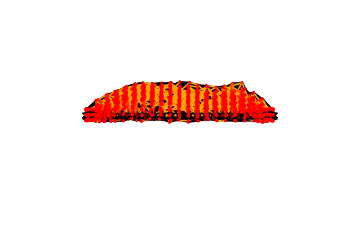

In [0]:
ax = Lattice_Plot(x, y, z, M3, deformed_springs, 'YZ', 30, 85, 0.2, 'rand_5_YZ')

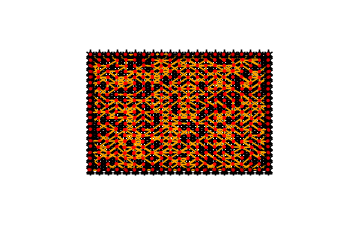

In [0]:
ax = Lattice_Plot(x, y, z, M3, deformed_springs, 'XY', 30, 85, 0.5, 'rand_5_XY')

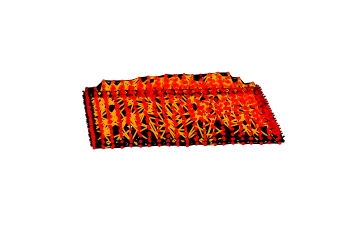

In [0]:
ax = Lattice_Plot(x, y, z, M3, deformed_springs, 'YsZ', 25, 85, 0.2, 'rand_5_3D')

In [0]:
nSprings = len(M3.springs)

In [0]:
nDeformed = int(0.10*nSprings)

In [0]:
np.random.randint(1, nSprings, nDeformed)

900

In [0]:
nSprings

9002

In [0]:
type(z0)

list

In [0]:
z0[2]

-0.01

In [0]:
z_check[2]

-0.007770737036373073